In [1]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('titanic-passengers.csv', sep=';')

# Display the head of the dataset (first few rows)
print(data.head())

# Get general information about the data columns and values
print(data.info())


   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):


In [2]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Replace missing values in the 'Age' column with the median age
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# Replace missing values in the 'Cabin' column with a placeholder (e.g., 'Unknown')
data['Cabin'].fillna('Unknown', inplace=True)

# Replace missing values in the 'Embarked' column with the mode (most frequent value)
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

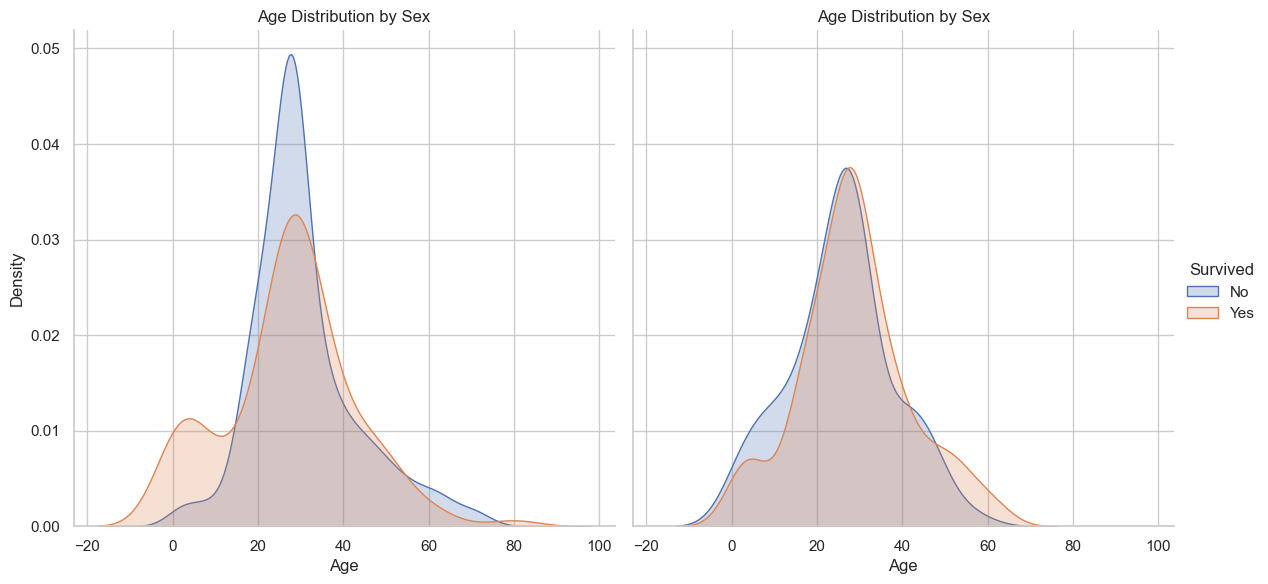

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a FacetGrid to visualize the distribution of 'Age' by 'Sex' and color by 'Survived'
g = sns.FacetGrid(data, col="Sex", hue="Survived", height=6)
g.map(sns.kdeplot, "Age", shade=True)

# Add a legend
g.add_legend(title="Survived")

# Set axis labels and title
g.set_axis_labels("Age", "Density")
g.set_titles("Age Distribution by Sex")

# Show the plot
plt.show()


C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\elfec\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

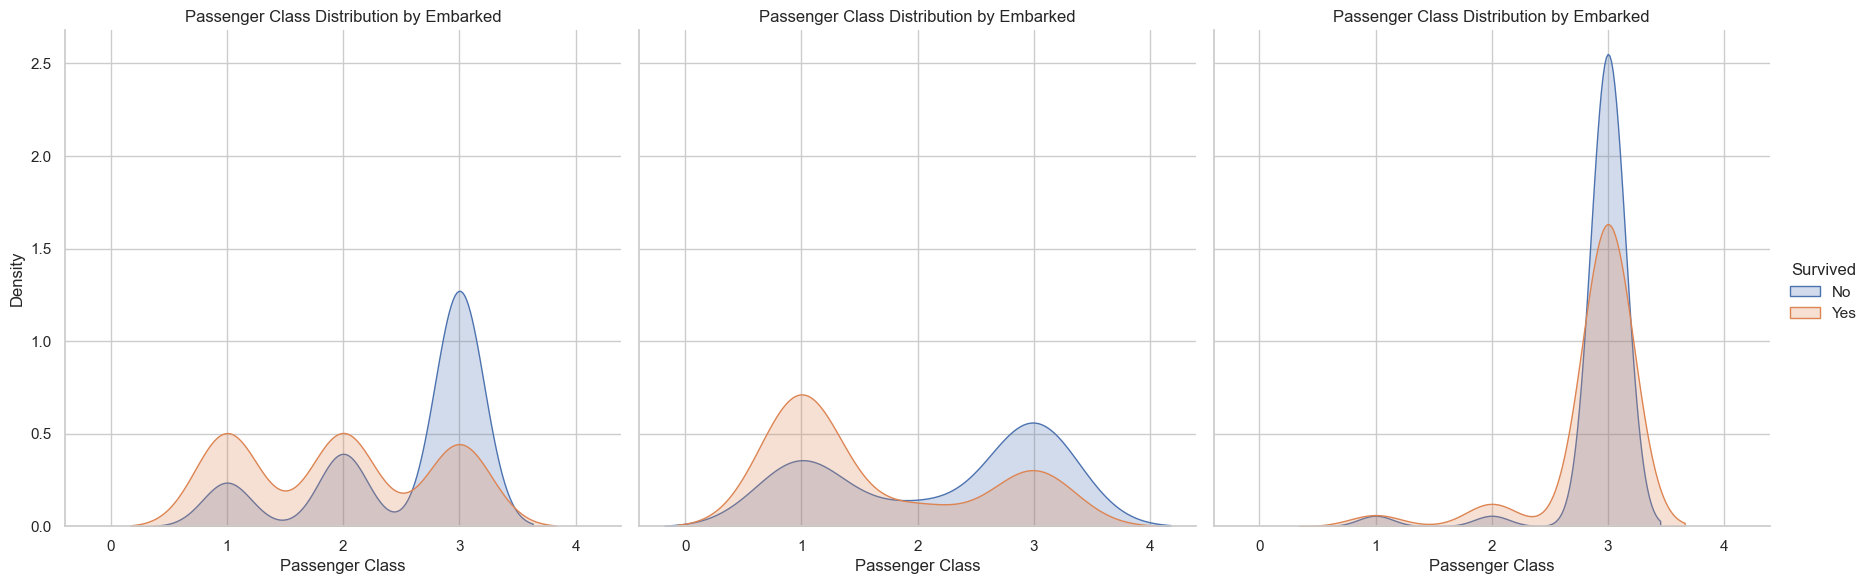

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a FacetGrid to visualize the distribution of 'Pclass' by 'Embarked' and color by 'Survived'
g = sns.FacetGrid(data, col="Embarked", hue="Survived", height=6)
g.map(sns.kdeplot, "Pclass", shade=True)

# Add a legend
g.add_legend(title="Survived")

# Set axis labels and title
g.set_axis_labels("Passenger Class", "Density")
g.set_titles("Passenger Class Distribution by Embarked")

# Show the plot
plt.show()


C:\Users\elfec\AppData\Local\Temp\ipykernel_17588\3296943067.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


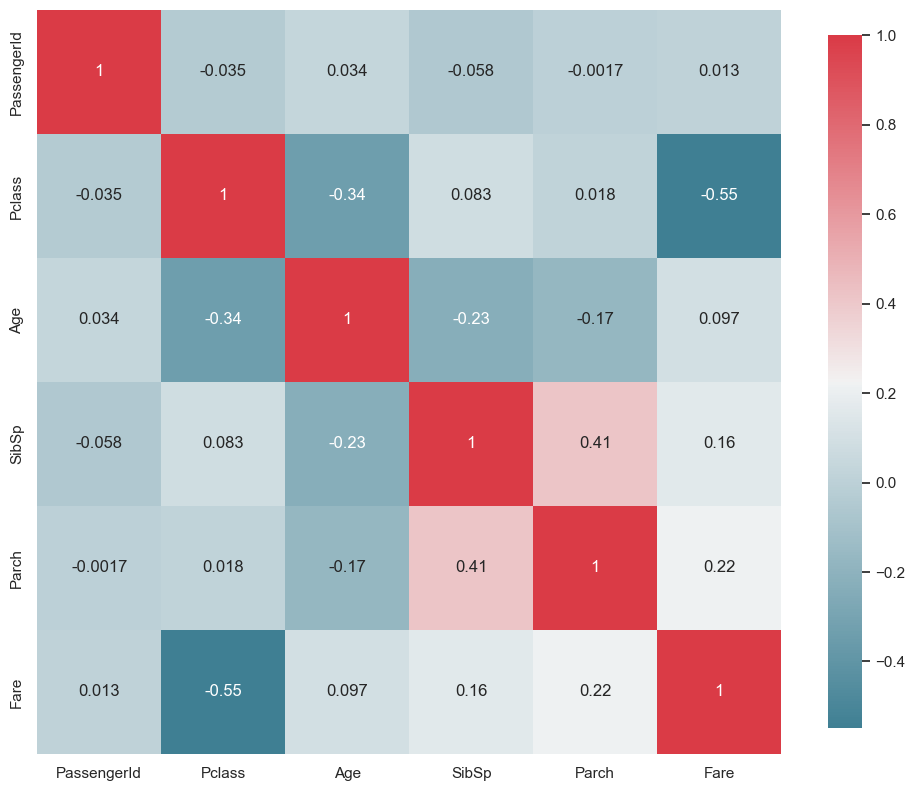

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_map(data):
    # Calculate the correlation matrix
    corr = data.corr()
    
    # Create a blank heatmap figure
    s, ax = plt.subplots(figsize=(12, 10))
    
    # Define the color map
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Plot the heatmap
    s = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize': 12}
    )
    
    # Show the heatmap
    plt.show()

# Call the plot_correlation_map function with your dataset
plot_correlation_map(data)

This function is useful for quickly visualizing the interdependencies between numeric features in a dataset. It helps identify strong positive or negative correlations, aiding in feature selection, data exploration, and understanding the underlying relationships in the data. For this particular data the Titanic dataset, it can reveal insights into factors that might have influenced passenger survival.

In [6]:
# Convert 'Survived' column to 1 for 'Yes' and 0 for 'No'
data['Survived'] = data['Survived'].map({'Yes': 1, 'No': 0})

# Group the data by 'Pclass' and calculate the mean of 'Survived'
pclass_survival = data.groupby('Pclass')['Survived'].mean()

# Display the result
print(pclass_survival)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [7]:
# Drop the 'Name' column
#data = data.drop(columns=['Name'])

# Display the DataFrame to confirm the column is dropped
#print(data.head())


In [8]:
# Extract titles from the 'Name' column using a regular expression
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')

# Display the unique titles to understand the available titles
print(data['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Dr' 'Major' 'Don' 'Master' 'Rev' 'Col' 'Mlle' 'Lady'
 'Jonkheer' 'Mme' 'Sir' 'Capt' 'Countess' 'Ms']


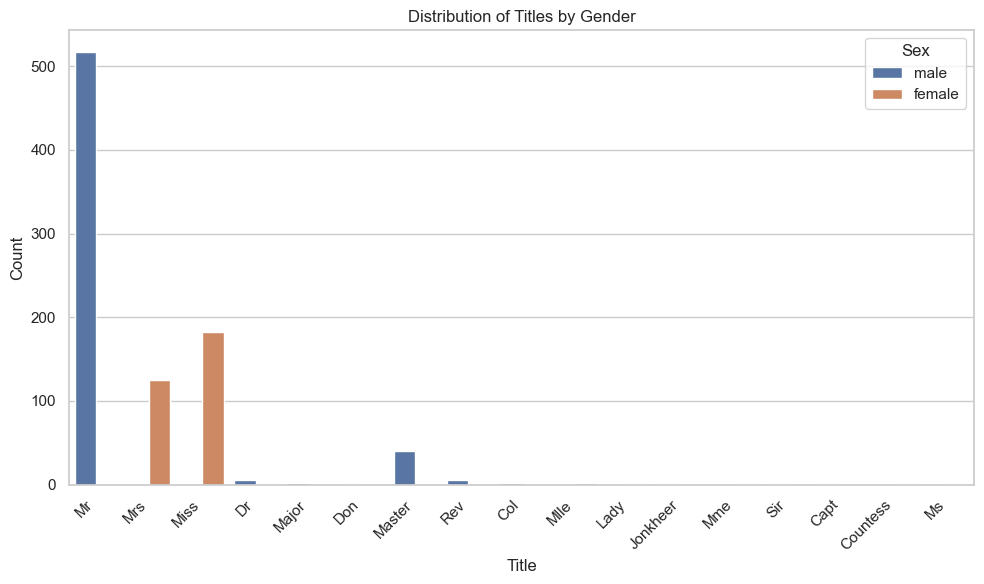

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the distribution of titles by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', hue='Sex', data=data)

# Add labels and title
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Distribution of Titles by Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend(title='Sex')
plt.show()


In [10]:
# Define the Title_Dictionary for title grouping
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Miss",
    "Mlle": "Miss",
    "Miss": "Miss",
    "Ms": "Mrs",
    "Mr": "Mrs",
    "Mrs": "Mrs",
    "Master": "Master"
}

# Map the titles to their grouped categories using the Title_Dictionary
data['Title_Grouped'] = data['Title'].map(Title_Dictionary)

# Display the unique values in the 'Title_Grouped' column to verify the grouping
print(data['Title_Grouped'].unique())


['Mrs' 'Miss' 'Officer' 'Royalty' 'Master' nan]


C:\Users\elfec\AppData\Local\Temp\ipykernel_17588\2797603318.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


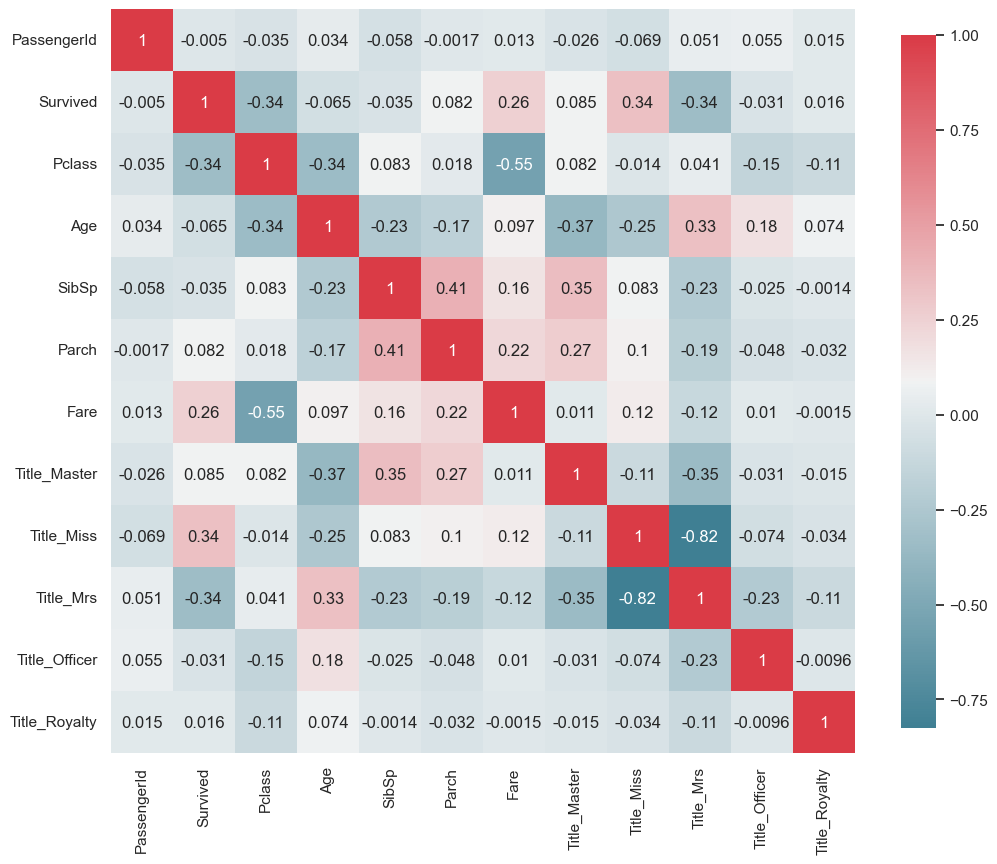

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Title_Grouped' into one-hot encoded columns
data = pd.get_dummies(data, columns=['Title_Grouped'], prefix='Title')

# Calculate the correlation matrix
corr = data.corr()

# Create a blank heatmap figure
s, ax = plt.subplots(figsize=(12, 10))

# Define the color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap
s = sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    cbar_kws={'shrink': .9},
    ax=ax,
    annot=True,
    annot_kws={'fontsize': 12}
)

# Show the heatmap
plt.show()


In [12]:
# Create the 'FamilySize' feature by adding 'Parch' and 'SibSp'
data['FamilySize'] = data['Parch'] + data['SibSp']

# Display the first few rows of the DataFrame to verify the new feature
print(data[['Parch', 'SibSp', 'FamilySize']].head())


   Parch  SibSp  FamilySize
0      0      0           0
1      0      0           0
2      0      0           0
3      4      0           4
4      0      1           1
